In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.rename(columns={
    'Annual Income (k$)':'Income',
    'Spending Score (1-100)':'Score'
},inplace=True)

In [10]:
data = df.drop(columns=['CustomerID','Genre','Age']) #,inplace=True)
data.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Income  200 non-null    int64
 1   Score   200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [12]:
data.isnull().sum()

Income    0
Score     0
dtype: int64

In [13]:
X = data
X

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
from sklearn.cluster import KMeans

In [15]:
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print(wcss)

[269981.28, 183811.28277016425, 106348.37306211118, 73880.64496247194, 44448.45544793371, 37564.94305477132, 35596.81859177644, 27692.869132706375, 22833.09624819625, 19755.6198608334]


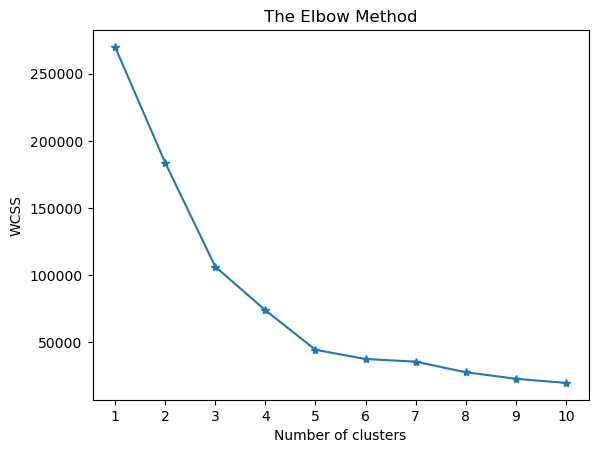

In [16]:
plt.plot(range(1,11),wcss,marker = '*')
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
Kmeans = KMeans(n_clusters = 5 , init = 'k-means++' ,random_state = True)
df['km_cluster'] = Kmeans.fit_predict(X)

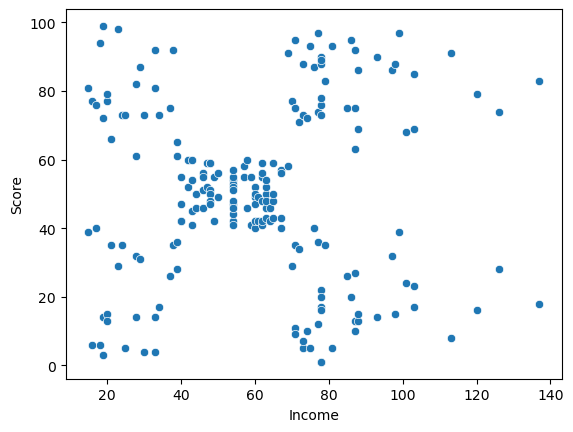

In [18]:
sns.scatterplot(x='Income',y='Score',data=df)
plt.show()

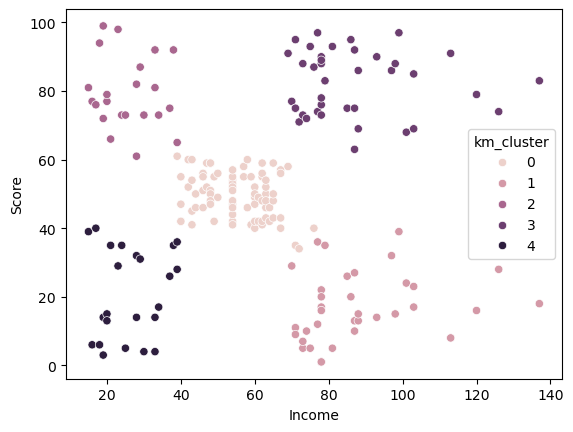

In [21]:
sns.scatterplot(x='Income',y='Score',data=X,hue=df['km_cluster'])
plt.show()

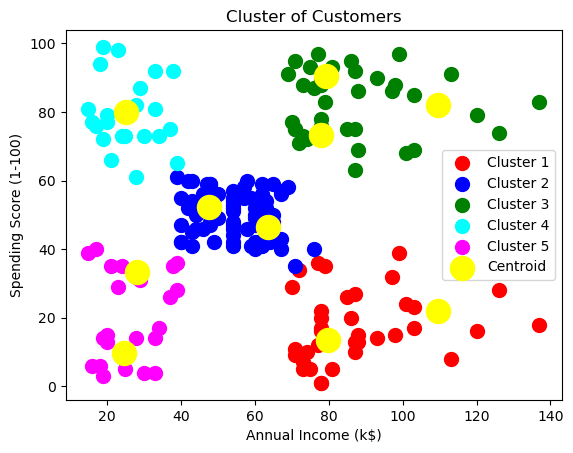

In [50]:
'''
plt.scatter(X[y_Kmeans == 0, 0], X[y_Kmeans == 0, 1],
           s = 100, c = 'red' , label = 'Cluster 1')
plt.scatter(X[y_Kmeans == 1, 0], X[y_Kmeans == 1, 1],
           s = 100, c = 'blue' , label = 'Cluster 2')
plt.scatter(X[y_Kmeans == 2, 0], X[y_Kmeans == 2, 1],
           s = 100, c = 'green' , label = 'Cluster 3')
plt.scatter(X[y_Kmeans == 3, 0], X[y_Kmeans == 3, 1],
           s = 100, c = 'cyan' , label = 'Cluster 4')
plt.scatter(X[y_Kmeans == 4, 0], X[y_Kmeans == 4, 1],
           s = 100, c = 'magenta' , label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s = 300, c = 'yellow' , label = 'Centroid')

plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
'''

In [ ]:
'''
This code snippet visualizes the results of a k-means clustering algorithm applied to a dataset. Let's break down what each line does:

**1. Plotting Data Points for Each Cluster:**

* `plt.scatter(X[y_Kmeans == 0, 0], X[y_Kmeans == 0, 1], s = 100, c = 'red' , label = 'Cluster 1')`: 
    - This line plots the data points belonging to the first cluster (cluster 0). 
    - `X[y_Kmeans == 0, 0]`: Extracts the x-coordinates of the data points assigned to cluster 0. 
    - `X[y_Kmeans == 0, 1]`: Extracts the y-coordinates of the data points assigned to cluster 0.
    - `s = 100`: Sets the size of the markers for the data points.
    - `c = 'red'`: Sets the color of the markers for this cluster to red.
    - `label = 'Cluster 1'`: Sets the label for this cluster in the legend.

* Lines 2-5: These lines repeat the same logic for clusters 2, 3, 4, and 5, using different colors (blue, green, cyan, magenta) for each cluster.

**2. Plotting Cluster Centroids:**

* `plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow' , label = 'Centroid')`:
    - `kmeans.cluster_centers_[:,0]`: Extracts the x-coordinates of the cluster centroids.
    - `kmeans.cluster_centers_[:,1]`: Extracts the y-coordinates of the cluster centroids.
    - `s = 300`: Sets the size of the markers for the centroids to be larger than the data points.
    - `c = 'yellow'`: Sets the color of the centroids to yellow.
    - `label = 'Centroid'`: Sets the label for the centroids in the legend.

**3. Enhancing the Plot:**

* `plt.title('Cluster of Customers')`: Sets the title of the plot.
* `plt.xlabel('Annual Income (k$)')`: Sets the label for the x-axis (assuming the first column of your data represents Annual Income).
* `plt.ylabel('Spending Score (1-100)')`: Sets the label for the y-axis (assuming the second column of your data represents Spending Score).
* `plt.legend()`: Displays a legend to identify each cluster and the centroids.
* `plt.show()`: Displays the generated plot.

This code effectively visualizes the results of your k-means clustering by plotting the data points for each cluster with different colors and highlighting the cluster centroids. This visualization helps you understand how the data is grouped and how the centroids represent the centers of each cluster.
'''